# China Cheng Xin Capstone Project

Contributer: Dawei Zhang, Jiahe Hou, Yuan Xin

<h2>Data Preparation and Visualization</h2>

In [10]:
# packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [17]:
behavior = pd.read_csv('Behavior_train.csv', encoding='gb2312')
behavior

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Share_Bike_uninstall_2M_3M,TRA_Traffic_Law_all_0M_1M,TRA_Traffic_Law_all_1M_2M,TRA_Traffic_Law_all_2M_3M,TRA_Traffic_Law_installing_0M_1M,TRA_Traffic_Law_installing_1M_2M,TRA_Traffic_Law_installing_2M_3M,TRA_Traffic_Law_uninstall_0M_1M,TRA_Traffic_Law_uninstall_1M_2M,TRA_Traffic_Law_uninstall_2M_3M
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
list(behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_1M_2M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_Car_installing_0M_1M',
 'ASSETS_Own_Car_installing_1M_2M',
 'ASSETS_Own_Car_installing_2M_3M',
 'ASSETS_Own_Car_uninstall_0M_1M',
 'ASSETS_Own_Car_uninstall_1M_2M',
 'ASSETS_Own_Car_uninstall_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_1M_2M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Own_House_installing_0M_1M',
 'ASSETS_Own_House_installing_1M_2M',
 'ASSETS_Own_House_installing_2M_3M',
 'ASSETS_Own_House_uninstall_0M_1M',
 'ASSETS_Own_House_uninstall_1M_2M',
 'ASSETS_Own_House_uninstall_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_1M_2M',
 'ASSETS_Rent_House_all_2M_3M',
 'ASSET

In [4]:
province = behavior.groupby(['MobileProv']).size().sort_values(ascending=False)
province

MobileProv
广东     3410
浙江     1899
江苏     1694
四川     1165
福建     1123
山东      965
湖北      956
河南      941
广西      742
上海      735
河北      679
湖南      668
北京      645
云南      563
安徽      528
江西      512
辽宁      471
陕西      470
山西      455
重庆      421
贵州      369
黑龙江     305
甘肃      235
吉林      234
内蒙古     222
海南      199
天津      180
宁夏       76
新疆       71
青海       42
西藏        7
dtype: int64

In [5]:
gender = data.groupby(['gender'])
ax =gender.size().plot(kind='pie',figsize=(6,6),title = "Consumer Gender Distribution",colormap = 'tab20')
ax
# plt.axis('equal')
# plt.show()

NameError: name 'data' is not defined

Text(0,0.5,'Count')

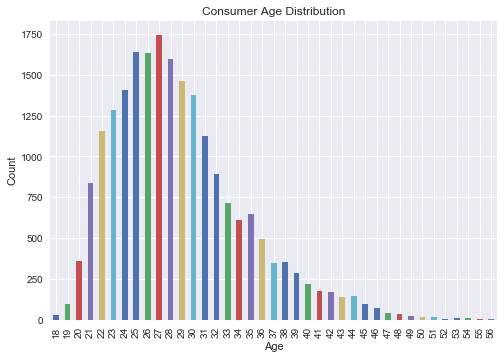

In [85]:
plt.style.use('seaborn')
age = data.groupby(['age'])
ax =age.size().plot(kind='bar',title = "Consumer Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")

In [86]:
consumer = pd.read_csv('Consumer_train.csv',encoding = 'utf-8')
consumer.head()

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,Shandong,济宁,任城,10.0,38.0,48.0,6/4/15 09:41,淘宝分销,0.0,0.0,0000-00-00 00:00:00,1.0,38.0,书籍/杂志/报纸
1,1,Shandong,济宁,任城,10.0,38.0,48.0,6/4/15 09:41,淘宝分销,0.0,0.0,6/3/15 23:04,1.0,38.0,书籍/杂志/报纸
2,1,Jiangsu,徐州,新沂,0.0,25.0,25.0,11/28/15 20:36,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,25.0,书籍/杂志/报纸
3,1,Jiangsu,徐州,新沂,0.0,49.5,49.5,7/9/14 10:08,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,49.5,女士内衣/男士内衣/家居服
4,1,Jiangsu,徐州,新沂,0.0,12.8,12.8,10/14/16 22:16,淘宝,0.0,27.0,10/14/16 22:16,1.0,12.8,书籍/杂志/报纸


In [87]:
province2 = consumer.groupby(['province']).size().sort_values(ascending=False)
province2

province
Guangdong       54109
Zhejiang        45113
Jiangsu         39312
Shanghai        31092
Fujian          21635
Shandong        18591
Sichuan         17528
Hubei           15906
Henan           15750
Beijing         14624
Hunan           12641
Hebei           12616
Yunnan          10976
Guangxi         10842
Anhui            9909
Jiangxi          9600
Liaoning         8682
Shan3xi          8033
Chongqing        7182
Shan1xi          6993
Guizhou          6581
Heilongjiang     5419
Tianjin          4930
Jilin            4084
Neimenggu        3927
Gansu            3546
Hainan           3249
Ningxia          1117
Xinjiang         1109
Qinghai           654
NON               483
Xizang            133
HongKong            1
dtype: int64

<h2>Data Cleaning</h2>

Behavioral dataset:
- combine features
    - leave only the "all" columns
    - sum up each "all" category 
    - delete coumns with 1M-2M and 2M-3M


In [15]:
list(behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_installing_0M_1M',
 'ASSETS_Own_Car_installing_1M_2M',
 'ASSETS_Own_Car_installing_2M_3M',
 'ASSETS_Own_Car_uninstall_0M_1M',
 'ASSETS_Own_Car_uninstall_1M_2M',
 'ASSETS_Own_Car_uninstall_2M_3M',
 'ASSETS_Own_House_installing_0M_1M',
 'ASSETS_Own_House_installing_1M_2M',
 'ASSETS_Own_House_installing_2M_3M',
 'ASSETS_Own_House_uninstall_0M_1M',
 'ASSETS_Own_House_uninstall_1M_2M',
 'ASSETS_Own_House_uninstall_2M_3M',
 'ASSETS_Rent_House_installing_0M_1M',
 'ASSETS_Rent_House_installing_1M_2M',
 'ASSETS_Rent_House_installing_2M_3M',
 'ASSETS_Rent_House_uninstall_0M_1M',
 'ASSETS_Rent_House_uninstall_1M_2M',
 'ASSETS_Rent_House_uninstall_2M_3M',
 'BOOK_Comic_installing_0M_1M',
 'BOOK_Comic_install

In [19]:
# deleting columns with string "installing" and "uninstall"
def delete_extra(df):
    pattern1 = r'_installing_'
    pattern2 = r'_uninstall_'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern1, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    for i in colnames:
        match = re.search(pattern2, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df

In [20]:
new_behavior = delete_extra(behavior)

In [22]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_1M_2M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_1M_2M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_1M_2M',
 'ASSETS_Rent_House_all_2M_3M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Comic_all_1M_2M',
 'BOOK_Comic_all_2M_3M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Fantasy_all_1M_2M',
 'BOOK_Novel_Fantasy_all_2M_3M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_Romance_all_1M_2M',
 'BOOK_Novel_Romance_all_2M_3M',
 'BOOK_Novel_all_0M_1M',
 'BOOK_Novel_all_1M_2M',
 'BOOK_Novel_all_2M_3M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_BusinessCard_all_1M_2M',
 'BUS_BusinessCard_all_2M_3M',
 'BU

In [23]:
# sum up three peroid to 0m-1m for each category
def add_all(df):
    pattern = r'_all_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match: 
            index = df.columns.get_loc(i)
            df[i] = df.iloc[:, index:(index+3)].sum(axis=1)
    return df

In [24]:
new_behavior = add_all(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Guide_all_2M_3M,TRA_Map_GPS_all_0M_1M,TRA_Map_GPS_all_1M_2M,TRA_Map_GPS_all_2M_3M,TRA_Share_Bike_all_0M_1M,TRA_Share_Bike_all_1M_2M,TRA_Share_Bike_all_2M_3M,TRA_Traffic_Law_all_0M_1M,TRA_Traffic_Law_all_1M_2M,TRA_Traffic_Law_all_2M_3M
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,1.0,3.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,NaN,NaN
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [25]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_1M_2M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_1M_2M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_1M_2M',
 'ASSETS_Rent_House_all_2M_3M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Comic_all_1M_2M',
 'BOOK_Comic_all_2M_3M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Fantasy_all_1M_2M',
 'BOOK_Novel_Fantasy_all_2M_3M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_Romance_all_1M_2M',
 'BOOK_Novel_Romance_all_2M_3M',
 'BOOK_Novel_all_0M_1M',
 'BOOK_Novel_all_1M_2M',
 'BOOK_Novel_all_2M_3M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_BusinessCard_all_1M_2M',
 'BUS_BusinessCard_all_2M_3M',
 'BU

In [28]:
# delete all_1M_2M
def delete_all_12(df):
    pattern = r'_all_1M_2M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df

In [29]:
new_behavior = delete_all_12(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_all_0M_1M,TRA_Car_all_2M_3M,TRA_Guide_all_0M_1M,TRA_Guide_all_2M_3M,TRA_Map_GPS_all_0M_1M,TRA_Map_GPS_all_2M_3M,TRA_Share_Bike_all_0M_1M,TRA_Share_Bike_all_2M_3M,TRA_Traffic_Law_all_0M_1M,TRA_Traffic_Law_all_2M_3M
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,NaN,3.0,1.0,3.0,1.0,0.0,NaN,0.0,NaN
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,NaN,2.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [31]:
# delete all_2M_3M
def delete_all_23(df):
    pattern = r'_all_2M_3M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_all_23(new_behavior)

In [32]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Rent_House_all_0M_1M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_all_0M_1M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_Calculator_all_0M_1M',
 'BUS_Note_all_0M_1M',
 'BUS_Reader_all_0M_1M',
 'BUS_Soft_Communication&Meeting_all_0M_1M',
 'BUS_Soft_Document_all_0M_1M',
 'BUS_Soft_Efficient_all_0M_1M',
 'BUS_Software_all_0M_1M',
 'DEVICE_Stability_0M_1M',
 'DEVICE_Stability_1M_2M',
 'DEVICE_Stability_2M_3M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books_all_0M_1M',
 'EDU_Child

In [53]:
# change column names where has "all_0m_1m" (delete this part)
def rename(df):
    pattern = r'_all_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.rename(columns={i:i[:-10]}, inplace=True)
    return df

In [55]:
new_behavior = rename(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability_0M_1M',
 'DEVICE_Stability_1M_2M',
 'DEVICE_Stability_2M_3M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime_0M_1M',
 'FIN_Ba

In [58]:
# further cleaning: delete columns with "_0W_1W"
def delete_01w(df):
    pattern = r'_0W_1W'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_01w(new_behavior)

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# add all values to 0m-1m
def add_to01(df):
    pattern = r'_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match: 
            index = df.columns.get_loc(i)
            df[i] = df.iloc[:, index:(index+3)].sum(axis=1)
    return df
new_behavior = add_to01(new_behavior)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability_0M_1M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime_0M_1M',
 'FIN_Bank_Creditcard_total_open_0M_1M',
 'FIN_Bank_Creditcard

In [66]:
# delete 1m-2m, 2m-3m again
def delete_12_23(df):
    pattern1 = r'_1M_2M'
    pattern2 = r'_2M_3M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern1, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    for i in colnames:
        match = re.search(pattern2, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_12_23(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# rename the feature again
def rename(df):
    pattern = r'_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.rename(columns={i:i[:-6]}, inplace=True)
    return df
new_behavior = rename(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FI

In [80]:
# delete empty rows
new_behavior.loc[:, (new_behavior != 0).any(axis=0)]
new_behavior.loc[(new_behavior != 0).any(axis=1), :]

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
